<a href="https://colab.research.google.com/github/D1N3SH-DEV/AMD_Forecast_GPT/blob/main/yf_AMD_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecasting AMD share price data for the next 30 days using no-code concept i.e. via ChatGPT on Python progragramming using **Seasonal Auto-Regressive Integrated Moving Average with eXogenous (SARIMAX)** factors algorithm.
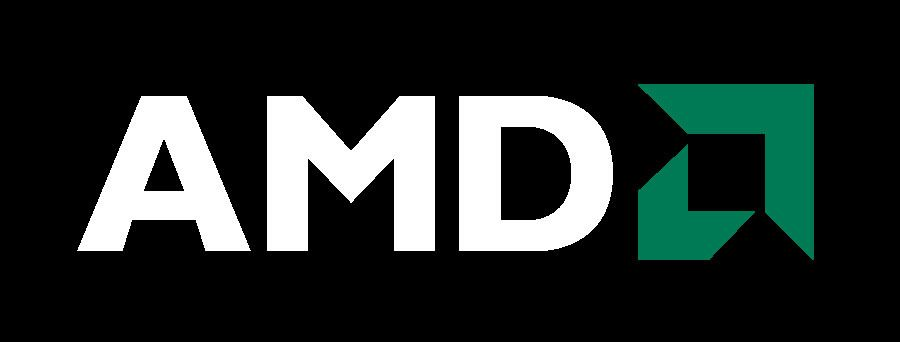

**1.**   Install required **libraries**


In [15]:
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install statsmodels
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.6 MB/s eta 0:00:00


**2. Load required libraries**

In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

**3. Fetch AMD share price data**

In [30]:
ticker_symbol = "AMD"  # Ticker symbol for AMD on Yahoo Finance
start_date = "2020-01-01"
end_date = "2023-08-28"

data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


**4. Create a dataframe with date and adjusted close price**

In [31]:
df = pd.DataFrame({'Date': data.index, 'Price': data['Adj Close']})
df.reset_index(drop=True, inplace=True)

**5. Prepare Data**

In [32]:
df.set_index('Date', inplace=True)
df_daily = df.resample('D').ffill()
df_price = df_daily[['Price']]

**6. Train-test split**

In [33]:
train_size = int(0.8 * len(df_price))
train_data = df_price[:train_size]
test_data = df_price[train_size:]

**7. Fit an SARIMAX model**

In [34]:
order = (5, 1, 0)  # Parameters for ARIMA (p, d, q)
model = SARIMAX(train_data, order=order)
model_fit = model.fit(disp=0)

**8. Make predictions for the next 10 days**

In [38]:
forecast_steps = 30 #for 30 days
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_index = pd.date_range(start=test_data.index[-1], periods=forecast_steps + 1, closed='right')

<ipython-input-38-61dee9ccb1d4>:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=test_data.index[-1], periods=forecast_steps + 1, closed='right')


**9. Plot actual prices and forecasted prices**

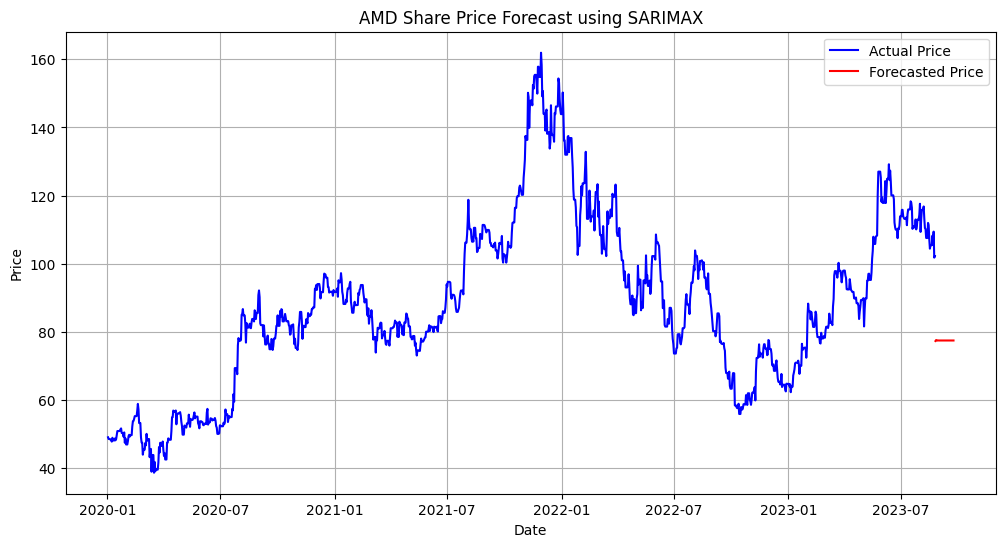

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df_price.index, df_price, label='Actual Price', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted Price', color='red')
plt.title('AMD Share Price Forecast using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**10. Display the forecasts**

In [37]:
print("Forecasted Prices:")
print(forecast_mean)

Forecasted Prices:
2022-12-02    77.349931
2022-12-03    77.619940
2022-12-04    77.587208
2022-12-05    77.476799
2022-12-06    77.501852
2022-12-07    77.505072
2022-12-08    77.492361
2022-12-09    77.495248
2022-12-10    77.498152
2022-12-11    77.496659
2022-12-12    77.496743
2022-12-13    77.497220
2022-12-14    77.497042
2022-12-15    77.496976
2022-12-16    77.497045
2022-12-17    77.497031
2022-12-18    77.497016
2022-12-19    77.497025
2022-12-20    77.497025
2022-12-21    77.497023
2022-12-22    77.497024
2022-12-23    77.497024
2022-12-24    77.497024
2022-12-25    77.497024
2022-12-26    77.497024
2022-12-27    77.497024
2022-12-28    77.497024
2022-12-29    77.497024
2022-12-30    77.497024
2022-12-31    77.497024
Freq: D, Name: predicted_mean, dtype: float64
